In [1]:
import dowhy
import pcalg
import networkx as nx
import numpy as np
import logging
import sys
sys.path.append('../')

from  algs.scm_generator import SCMGenerator

c:\Users\scroo\MLProjects\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


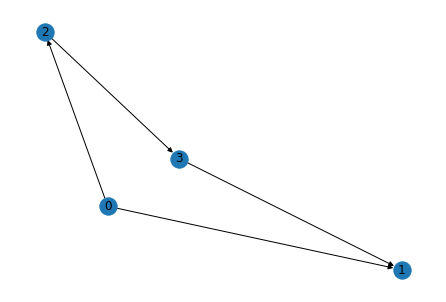

In [4]:
seed = 3304
test = SCMGenerator(4, 1, in_cluster_connectivity= 0.3, between_cluster_connectivity = 0.2, seed = seed)
test.make_dag()
nx.draw(test.graph, with_labels = True)
test.scm_equations()
# data = test.generate_data()
# print(data)

In [5]:
test.written_equations
test.generate_data()

In [6]:
from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data

import pytest

from pcalg import estimate_cpdag
from pcalg import estimate_skeleton

In [7]:
'''
Test suite for pcalg
'''
import networkx as nx
import numpy as np

from gsq.ci_tests import ci_test_bin, ci_test_dis
from gsq.gsq_testdata import bin_data, dis_data

import pytest

from pcalg import estimate_cpdag
from pcalg import estimate_skeleton

@pytest.mark.parametrize(('indep_test_func', 'data_matrix', 'g_answer'), [
    (ci_test_bin, np.array(bin_data).reshape((5000, 5)), nx.DiGraph({
        0: (1, ),
        1: (),
        2: (3, 4),
        3: (1, 2),
        4: (1, 2),
    })),
    (ci_test_dis, np.array(dis_data).reshape((10000, 5)), nx.DiGraph({
        0: (2, ),
        1: (2, 3),
        2: (),
        3: (),
        4: (3, ),
    })),
])
def test_estimate_cpdag(indep_test_func, data_matrix, g_answer, alpha=0.01):
    '''
    estimate_cpdag should reveal the answer
    '''
    (graph, sep_set) = estimate_skeleton(indep_test_func=indep_test_func,
                                         data_matrix=data_matrix,
                                         alpha=alpha)
    graph = estimate_cpdag(skel_graph=graph, sep_set=sep_set)
    error_msg = 'True edges should be: %s' % (g_answer.edges(), )
    assert nx.is_isomorphic(graph, g_answer), error_msg

def test_fixed_edges():
    '''
    The fixed edges shall appear in the skeleton
    '''
    data_matrix = np.array(bin_data).reshape((5000, 5))
    (graph, sep_set) = estimate_skeleton(indep_test_func=ci_test_bin,
                                         data_matrix=data_matrix,
                                         alpha=0.01)
    graph = estimate_cpdag(skel_graph=graph, sep_set=sep_set)
    assert not graph.has_edge(1, 2)

    fixed_edges = nx.DiGraph()
    fixed_edges.add_nodes_from(range(5))
    fixed_edges.add_edge(1, 2)
    with pytest.raises(ValueError):
        _ = estimate_skeleton(indep_test_func=ci_test_bin,
                              data_matrix=data_matrix,
                              alpha=0.01,
                              fixed_edges=((1,2), ))
    with pytest.raises(ValueError):
        _ = estimate_skeleton(indep_test_func=ci_test_bin,
                              data_matrix=data_matrix,
                              alpha=0.01,
                              fixed_edges=nx.DiGraph({0: (1, )}))
    (graph, _) = estimate_skeleton(indep_test_func=ci_test_bin,
                                   data_matrix=data_matrix,
                                   alpha=0.01,
                                   fixed_edges=fixed_edges)
    assert graph.has_edge(1, 2), graph.edges


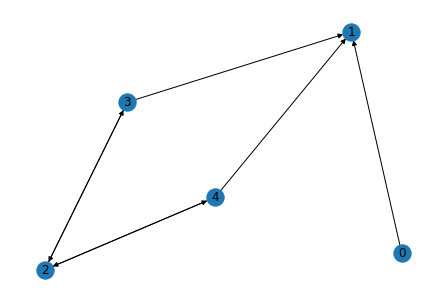

In [8]:
data_matrix = np.array(bin_data).reshape((5000, 5))
skeleton = estimate_skeleton(indep_test_func=ci_test_bin,
                              data_matrix=data_matrix,
                              alpha=0.01)
cpdag = estimate_cpdag(skel_graph=skeleton[0], sep_set=skeleton[1])
# nx.draw(skeleton[0], with_labels = True)
nx.draw(cpdag, with_labels = True)

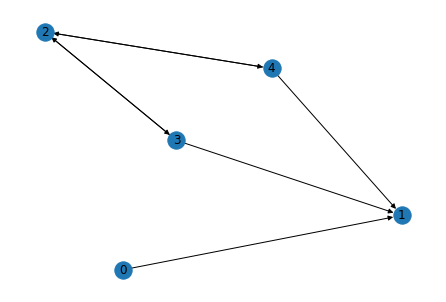

In [9]:
bin_data_matrix = np.array(bin_data).reshape((5000, 5))
skeleton = estimate_skeleton(indep_test_func=ci_test_bin,
                              data_matrix=bin_data_matrix,
                              alpha=0.01)
cpdag = estimate_cpdag(skel_graph=skeleton[0], sep_set=skeleton[1])
# nx.draw(skeleton[0], with_labels = True)
nx.draw(cpdag, with_labels = True)

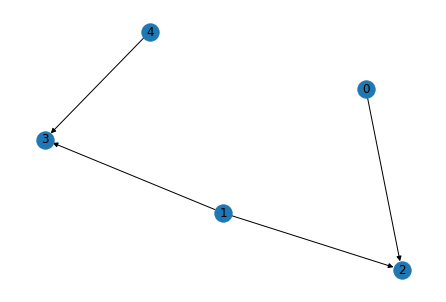

In [10]:
dis_data_matrix = np.array(dis_data).reshape((10000, 5))
skeleton = estimate_skeleton(indep_test_func=ci_test_dis, data_matrix=dis_data_matrix, alpha=0.01)
cpdag = estimate_cpdag(skel_graph=skeleton[0], sep_set=skeleton[1])
# nx.draw(skeleton[0], with_labels = True)
nx.draw(cpdag, with_labels = True)

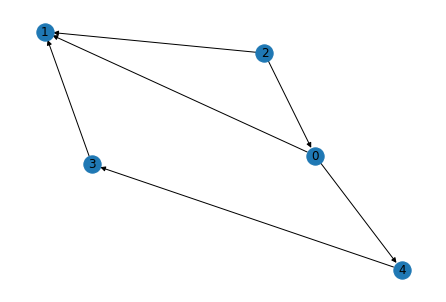

In [11]:
seed = 1
test = SCMGenerator(5, 1, in_cluster_connectivity= 0.3, between_cluster_connectivity = 0.2, seed = seed)
test.make_dag()
nx.draw(test.graph, with_labels = True)
test.scm_equations()
test.generate_data(samples = 1000)

In [13]:
test_data_matrix = np.transpose(test.data)
skeleton = estimate_skeleton(indep_test_func=ci_test_dis, data_matrix=test_data_matrix, alpha=0.01)
cpdag = estimate_cpdag(skel_graph=skeleton[0], sep_set=skeleton[1])
# nx.draw(skeleton[0], with_labels = True)
nx.draw(cpdag, with_labels = True)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [15]:
np.min(test_data_matrix)